In [40]:
import pandas as pd
import numpy as np
import seaborn as sns

# Read and clean data

In [41]:
# Read county data
df = pd.read_csv("../../data/final/county_data.csv")
df

,fips,cancer_incidence_rate_per_100000,cancer_mortality_rate_per_100000,breast_cancer_incidence_rate_per_100000,breast_cancer_mortality_rate_per_100000,colorectal_cancer_incidence_rate_per_100000,colorectal_cancer_mortality_rate_per_100000,leukemia_cancer_incidence_rate_per_100000,leukemia_cancer_mortality_rate_per_100000,lung_cancer_incidence_rate_per_100000,...,low_income_low_access_share,non_english_speaking,population_in_poverty_percent,population_over_25_no_high_school_diploma_percent,population_uninsured_percent,population_minority_percent,walkability_index,hospital_beds_per_100000,median_aqi,population
0,1001,490.100000,163.48000,129.9,21.590000,49.500000,15.19,13.700000,6.209143,67.800000,...,13.021568,1.3,22.665756,7.679865,7.809270,26.023113,5.483179,192.311149,NaN,55639.0
1,1003,452.400000,165.47000,128.1,22.200000,40.400000,13.93,14.000000,5.690000,70.000000,...,7.937893,1.8,16.681097,6.790539,9.391678,17.103015,6.812530,197.902780,43.0,218289.0
2,1005,425.703515,182.94000,NaN,18.871149,44.100000,15.42,10.700000,6.209143,63.100000,...,10.430856,2.8,35.822744,17.969312,9.438184,54.719092,5.156175,295.692480,NaN,25026.0
3,1007,467.300000,187.60000,140.7,22.050000,47.000000,14.30,9.772012,6.209143,78.300000,...,0.445123,1.4,25.610083,13.658711,8.393671,25.583266,5.241296,156.431572,NaN,22374.0
4,1009,432.000000,176.72000,130.0,20.360000,36.700000,14.17,13.900000,6.740000,70.300000,...,2.512124,3.3,23.589300,11.839668,9.948922,13.314865,4.674447,69.258073,NaN,57755.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,56037,384.839000,135.74306,NaN,21.630000,29.982216,14.20,10.600000,5.511023,41.686433,...,5.225312,3.3,17.791567,4.839454,11.715722,21.233161,7.693168,265.270345,45.0,43352.0
3138,56039,384.839000,135.74306,141.0,NaN,29.982216,NaN,20.300000,5.511023,41.686433,...,3.813281,7.8,11.898442,4.046070,11.414626,18.783182,7.276768,333.961295,44.0,23356.0
3139,56041,384.839000,135.74306,139.5,31.520000,29.982216,NaN,11.989089,5.511023,41.686433,...,1.373236,1.9,18.027879,4.432119,11.156376,12.668106,6.652280,1374.300579,44.0,20374.0
3140,56043,384.839000,135.74306,130.2,NaN,44.700000,NaN,11.989089,5.511023,41.686433,...,3.070432,1.8,18.706668,5.559057,11.975293,18.227657,7.429655,226.900290,NaN,7933.0


In [42]:
# Read in county data
df_state = pd.read_csv("../../data/final/state_data.csv")
df_state = df_state.set_index("fips")
df_state.head()

,cervical_cancer_incidence_rate_per_100000,cervical_cancer_mortality_rate_per_100000,hodgkins_lymphoma_cancer_incidence_rate_per_100000,hodgkins_lymphoma_cancer_mortality_rate_per_100000,melanoma_cancer_incidence_rate_per_100000,melanoma_cancer_mortality_rate_per_100000,colorectal_screening_percent,smoking_percent,hpv_vaccine_percent,state_population
fips,,,,,,,,,,
1,9.4,3.46,2.42,0.31,21.6,2.38,76.07,43.94,34.9,4893186.0
2,7.1,1.65,2.13,NaN,14.4,2.19,68.36,43.22,32.3,734096.0
4,6.5,2.10,2.00,0.28,24.5,2.48,75.32,40.35,39.9,7174064.0
5,9.5,3.43,2.62,0.30,21.7,2.12,73.39,47.06,26.8,3011873.0
6,7.2,2.24,2.18,0.31,22.9,2.06,75.60,33.45,38.8,39346023.0


In [43]:
# Add state fips for joining
df["state_fips"] = (df["fips"] / 1000).apply(np.floor).astype(int)
# Join county with state data
df = df.set_index("state_fips").join(df_state, on=["state_fips"]).reset_index()
# Remove join column and unnecessary population columns
df = df.drop(columns=["state_fips", "state_population", "fips", "population"])
df

,cancer_incidence_rate_per_100000,cancer_mortality_rate_per_100000,breast_cancer_incidence_rate_per_100000,breast_cancer_mortality_rate_per_100000,colorectal_cancer_incidence_rate_per_100000,colorectal_cancer_mortality_rate_per_100000,leukemia_cancer_incidence_rate_per_100000,leukemia_cancer_mortality_rate_per_100000,lung_cancer_incidence_rate_per_100000,lung_cancer_mortality_rate_per_100000,...,median_aqi,cervical_cancer_incidence_rate_per_100000,cervical_cancer_mortality_rate_per_100000,hodgkins_lymphoma_cancer_incidence_rate_per_100000,hodgkins_lymphoma_cancer_mortality_rate_per_100000,melanoma_cancer_incidence_rate_per_100000,melanoma_cancer_mortality_rate_per_100000,colorectal_screening_percent,smoking_percent,hpv_vaccine_percent
0,490.100000,163.48000,129.9,21.590000,49.500000,15.19,13.700000,6.209143,67.800000,48.430000,...,NaN,9.4,3.46,2.42,0.31,21.6,2.38,76.07,43.94,34.9
1,452.400000,165.47000,128.1,22.200000,40.400000,13.93,14.000000,5.690000,70.000000,47.250000,...,43.0,9.4,3.46,2.42,0.31,21.6,2.38,76.07,43.94,34.9
2,425.703515,182.94000,NaN,18.871149,44.100000,15.42,10.700000,6.209143,63.100000,54.490000,...,NaN,9.4,3.46,2.42,0.31,21.6,2.38,76.07,43.94,34.9
3,467.300000,187.60000,140.7,22.050000,47.000000,14.30,9.772012,6.209143,78.300000,54.260000,...,NaN,9.4,3.46,2.42,0.31,21.6,2.38,76.07,43.94,34.9
4,432.000000,176.72000,130.0,20.360000,36.700000,14.17,13.900000,6.740000,70.300000,53.940000,...,NaN,9.4,3.46,2.42,0.31,21.6,2.38,76.07,43.94,34.9
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3137,384.839000,135.74306,NaN,21.630000,29.982216,14.20,10.600000,5.511023,41.686433,40.710000,...,45.0,6.4,1.91,2.44,NaN,22.9,3.24,66.96,45.14,24.5
3138,384.839000,135.74306,141.0,NaN,29.982216,NaN,20.300000,5.511023,41.686433,27.651654,...,44.0,6.4,1.91,2.44,NaN,22.9,3.24,66.96,45.14,24.5
3139,384.839000,135.74306,139.5,31.520000,29.982216,NaN,11.989089,5.511023,41.686433,27.651654,...,44.0,6.4,1.91,2.44,NaN,22.9,3.24,66.96,45.14,24.5
3140,384.839000,135.74306,130.2,NaN,44.700000,NaN,11.989089,5.511023,41.686433,27.651654,...,NaN,6.4,1.91,2.44,NaN,22.9,3.24,66.96,45.14,24.5


# Calculate correlations

In [44]:
corr = df.corr()
corr = corr[list(filter(lambda x: "cancer" not in x, corr.columns))]
corr = corr.loc[list(filter(lambda x: "cancer" in x, corr.index))]
corr

,median_household_income,over_65_percent,uv_exposure,low_income_low_access_share,non_english_speaking,population_in_poverty_percent,population_over_25_no_high_school_diploma_percent,population_uninsured_percent,population_minority_percent,walkability_index,hospital_beds_per_100000,median_aqi,colorectal_screening_percent,smoking_percent,hpv_vaccine_percent
cancer_incidence_rate_per_100000,-0.054434,-0.010382,-0.428453,-0.138451,-0.297573,0.053208,0.032173,-0.272135,-0.228164,-0.095098,0.074322,0.120403,0.212209,0.249772,-0.018076
cancer_mortality_rate_per_100000,-0.348322,-0.020401,-0.242919,0.019344,-0.282818,0.422815,0.332899,0.055985,-0.048193,-0.297720,0.101888,0.036136,-0.025007,0.352440,-0.282971
breast_cancer_incidence_rate_per_100000,0.198887,0.003743,-0.148714,-0.049291,-0.083946,-0.171849,-0.162295,-0.171618,-0.025930,0.082001,0.060971,0.022694,0.100842,-0.051544,0.197437
breast_cancer_mortality_rate_per_100000,-0.076977,-0.071439,-0.087851,-0.031649,-0.098508,0.149168,0.106470,-0.001516,0.103879,-0.024840,0.036156,0.110293,0.027012,0.101742,-0.124900
colorectal_cancer_incidence_rate_per_100000,-0.219146,-0.073983,-0.235955,-0.014135,-0.190481,0.302728,0.227715,0.014342,0.017221,-0.244423,0.017291,0.049669,-0.101059,0.226858,-0.151468
colorectal_cancer_mortality_rate_per_100000,-0.222176,-0.077559,-0.157221,-0.011045,-0.164039,0.269005,0.179708,0.022849,0.028433,-0.171537,-0.003467,0.014259,-0.030503,0.221045,-0.146200
leukemia_cancer_incidence_rate_per_100000,-0.065060,0.032032,-0.090976,-0.101948,-0.067654,-0.137689,-0.151871,-0.180983,-0.219790,0.050740,-0.016714,0.014078,0.210009,0.072498,0.078300
leukemia_cancer_mortality_rate_per_100000,-0.127349,-0.040488,-0.126931,-0.048645,-0.136672,-0.009420,-0.057076,-0.096827,-0.176958,-0.055276,-0.004759,0.033795,0.069886,0.179458,-0.062990
lung_cancer_incidence_rate_per_100000,-0.265768,-0.032667,-0.410452,-0.148279,-0.324871,0.308871,0.283877,-0.082816,-0.204386,-0.321710,0.025780,0.113923,0.079764,0.459894,-0.253899
lung_cancer_mortality_rate_per_100000,-0.328794,-0.011401,-0.367252,-0.105667,-0.333603,0.373749,0.327559,-0.034126,-0.183257,-0.356128,0.007002,0.093330,0.041771,0.464620,-0.302581


<AxesSubplot: >

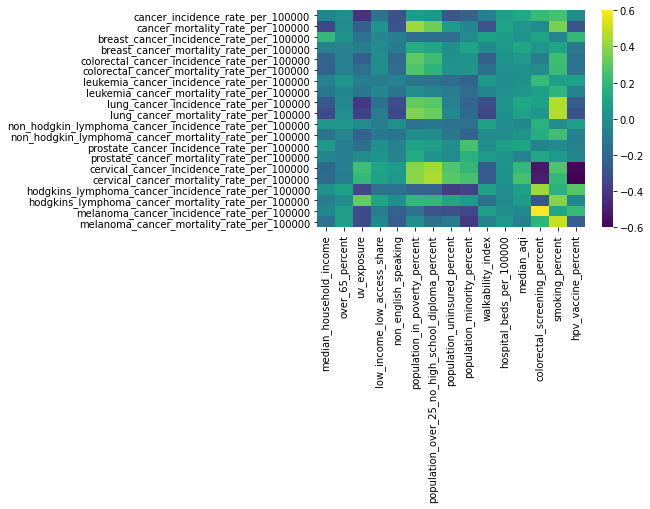

In [115]:
sns.heatmap(corr, cmap="viridis")

In [112]:
arr = np.array(corr)

def val_at(pair):
    x = corr.columns[pair[1]]
    y = corr.index[pair[0]]
    return corr.loc[y, x]

In [114]:
# Strongest positive correlations
num = 10
inds = np.argpartition(arr.ravel(), -num)[-num:]
corrs = np.vectorize(lambda i: val_at(np.unravel_index(i, arr.shape)))(inds)
for i in inds[np.argsort(corrs)]:
    ind = np.unravel_index(i, arr.shape)
    x = corr.columns[ind[1]]
    y = corr.index[ind[0]]
    val = val_at(ind)
    print("Corr: ", val, " x: ", x, " y: ", y)

Corr:  0.3841892236440818  x:  population_in_poverty_percent  y:  cervical_cancer_incidence_rate_per_100000
Corr:  0.3944335327311878  x:  population_in_poverty_percent  y:  cervical_cancer_mortality_rate_per_100000
Corr:  0.42281521375247083  x:  population_in_poverty_percent  y:  cancer_mortality_rate_per_100000
Corr:  0.425898220974448  x:  colorectal_screening_percent  y:  hodgkins_lymphoma_cancer_incidence_rate_per_100000
Corr:  0.43539711179166596  x:  population_over_25_no_high_school_diploma_percent  y:  cervical_cancer_incidence_rate_per_100000
Corr:  0.4526192009507988  x:  population_over_25_no_high_school_diploma_percent  y:  cervical_cancer_mortality_rate_per_100000
Corr:  0.45989380520718465  x:  smoking_percent  y:  lung_cancer_incidence_rate_per_100000
Corr:  0.464619650388894  x:  smoking_percent  y:  lung_cancer_mortality_rate_per_100000
Corr:  0.4951761467986093  x:  smoking_percent  y:  melanoma_cancer_mortality_rate_per_100000
Corr:  0.6023227607455456  x:  colorec

In [111]:
# Strongest negative correlations
num = 10
inds = np.argpartition(arr.ravel(), num)[:num]
corrs = np.vectorize(lambda i: val_at(np.unravel_index(i, arr.shape)))(inds)
for i in inds[np.argsort(corrs)]:
    ind = np.unravel_index(i, arr.shape)
    x = corr.columns[ind[1]]
    y = corr.index[ind[0]]
    val = corr.loc[y, x]
    print("Corr: ", val, " x: ", x, " y: ", y)

Corr:  -0.6006399822796471  x:  hpv_vaccine_percent  y:  cervical_cancer_mortality_rate_per_100000
Corr:  -0.58213646171068  x:  hpv_vaccine_percent  y:  cervical_cancer_incidence_rate_per_100000
Corr:  -0.5225053657797362  x:  colorectal_screening_percent  y:  cervical_cancer_incidence_rate_per_100000
Corr:  -0.49846951597010575  x:  colorectal_screening_percent  y:  cervical_cancer_mortality_rate_per_100000
Corr:  -0.4284525424385365  x:  uv_exposure  y:  cancer_incidence_rate_per_100000
Corr:  -0.41045242801971726  x:  uv_exposure  y:  lung_cancer_incidence_rate_per_100000
Corr:  -0.40069244965416745  x:  population_minority_percent  y:  melanoma_cancer_mortality_rate_per_100000
Corr:  -0.3872750935399467  x:  population_uninsured_percent  y:  hodgkins_lymphoma_cancer_incidence_rate_per_100000
Corr:  -0.36725177444913715  x:  uv_exposure  y:  lung_cancer_mortality_rate_per_100000
Corr:  -0.36160729326904917  x:  population_minority_percent  y:  hodgkins_lymphoma_cancer_incidence_rat